<a href="https://colab.research.google.com/github/franciskingk/stock-prediction-with-Facebook-prophet/blob/main/Facebook_prophet_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pystan fbprophet

In [3]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 5.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=a17d925844ac340581eab74a26b636ab3f86ef6bcba16b5a9ffc7419e99dfc33
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:
# importing dependensies
import pandas as pd
from fbprophet import Prophet
import requests
import yfinance as yf
import datetime
import io
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# set range of time for the training data
start = datetime.datetime(2019,1,2)
end = datetime.datetime(2021,8,30)

In [6]:
# get the stock ticker symbol provided 
url = "https://pkgstore.datahub.io/core/nasdaq-listings/nasdaq-listed_csv/data/7665719fb51081ba0bd834fde71ce822/nasdaq-listed_csv.csv"

s = requests.get(url).content
companies = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [7]:
companies.head()

,Symbol,Company Name,Security Name,Market Category,Test Issue,Financial Status,Round Lot Size
0,AAIT,iShares MSCI All Country Asia Information Tech...,iShares MSCI All Country Asia Information Tech...,G,N,N,100.0
1,AAL,"American Airlines Group, Inc.","American Airlines Group, Inc. - Common Stock",Q,N,N,100.0
2,AAME,Atlantic American Corporation,Atlantic American Corporation - Common Stock,G,N,N,100.0
3,AAOI,"Applied Optoelectronics, Inc.","Applied Optoelectronics, Inc. - Common Stock",G,N,N,100.0
4,AAON,"AAON, Inc.","AAON, Inc. - Common Stock",Q,N,N,100.0


In [8]:
#listing the symbols
symbols = companies['Symbol'].tolist()
symbols

['AAIT',
 'AAL',
 'AAME',
 'AAOI',
 'AAON',
 'AAPL',
 'AAVL',
 'AAWW',
 'AAXJ',
 'ABAC',
 'ABAX',
 'ABCB',
 'ABCD',
 'ABCO',
 'ABCW',
 'ABDC',
 'ABGB',
 'ABIO',
 'ABMD',
 'ABTL',
 'ABY',
 'ACAD',
 'ACAS',
 'ACAT',
 'ACET',
 'ACFC',
 'ACFN',
 'ACGL',
 'ACHC',
 'ACHN',
 'ACIW',
 'ACLS',
 'ACNB',
 'ACOR',
 'ACPW',
 'ACRX',
 'ACSF',
 'ACST',
 'ACTA',
 'ACTG',
 'ACTS',
 'ACUR',
 'ACWI',
 'ACWX',
 'ACXM',
 'ADAT',
 'ADBE',
 'ADEP',
 'ADES',
 'ADHD',
 'ADI',
 'ADMA',
 'ADMP',
 'ADMS',
 'ADNC',
 'ADP',
 'ADRA',
 'ADRD',
 'ADRE',
 'ADRU',
 'ADSK',
 'ADTN',
 'ADUS',
 'ADVS',
 'ADXS',
 'ADXSW',
 'AEGN',
 'AEGR',
 'AEHR',
 'AEIS',
 'AEPI',
 'AERI',
 'AETI',
 'AEY',
 'AEZS',
 'AFAM',
 'AFCB',
 'AFFX',
 'AFH',
 'AFMD',
 'AFOP',
 'AFSI',
 'AGEN',
 'AGII',
 'AGIIL',
 'AGIO',
 'AGNC',
 'AGNCB',
 'AGNCP',
 'AGND',
 'AGRX',
 'AGTC',
 'AGYS',
 'AGZD',
 'AHGP',
 'AHPI',
 'AIMC',
 'AINV',
 'AIQ',
 'AIRM',
 'AIRR',
 'AIRT',
 'AIXG',
 'AKAM',
 'AKAO',
 'AKBA',
 'AKER',
 'AKRX',
 'ALCO',
 'ALDR',
 'ALDX',
 'AL

In [9]:
# Downloading historical data from yahoo finance

# create an empty dataframe
stock_list=pd.DataFrame()

#create a loop for each symbol
for i in symbols:
    print(str(symbols.index(i)) + str(':') + i, sep=',', end=',',flush=True)
    try:
        # download the stock price
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False)

        # append the individual stock price
        if len(stock)== 0:
            None
        else:
            stock['Name']= i
            stock_list = stock_list.append(stock,sort=False)
    except Exception:
        None

0:AAIT,1:AAL,2:AAME,3:AAOI,4:AAON,5:AAPL,6:AAVL,7:AAWW,8:AAXJ,9:ABAC,
1 Failed download:
- ABAC: No data found for this date range, symbol may be delisted
10:ABAX,
1 Failed download:
- ABAX: No data found for this date range, symbol may be delisted
11:ABCB,12:ABCD,
1 Failed download:
- ABCD: No data found for this date range, symbol may be delisted
13:ABCO,14:ABCW,
1 Failed download:
- ABCW: No data found for this date range, symbol may be delisted
15:ABDC,
1 Failed download:
- ABDC: No data found, symbol may be delisted
16:ABGB,
1 Failed download:
- ABGB: No data found for this date range, symbol may be delisted
17:ABIO,18:ABMD,19:ABTL,
1 Failed download:
- ABTL: No data found for this date range, symbol may be delisted
20:ABY,
1 Failed download:
- ABY: No data found for this date range, symbol may be delisted
21:ACAD,22:ACAS,
1 Failed download:
- ACAS: No data found for this date range, symbol may be delisted
23:ACAT,
1 Failed download:
- ACAT: No data found for this date range, symb

In [ ]:
# saving the data onto a csv file
stock_list.to_csv('yahoo_finance_dataset.csv')

In [37]:
# loading the csv as the dataset 
from google.colab import drive
drive.mount('/content/gdrive/')



Mounted at /content/gdrive


In [62]:
final_stock_list=pd.read_csv("/content/gdrive/MyDrive/yahoo finance dataset/yahoo_finance_dataset.csv", parse_dates=['Date'])
final_stock_list.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,2019-01-02,0.099,0.099,0.099,0.099,0.099,49800.0,AAIT
1,2019-01-03,0.098,0.098,0.098,0.098,0.098,15000.0,AAIT
2,2019-01-07,0.099,0.100,0.097,0.098,0.098,95659.0,AAIT
3,2019-01-08,0.098,0.098,0.098,0.098,0.098,0.0,AAIT
4,2019-01-10,0.098,0.098,0.096,0.097,0.097,49000.0,AAIT
5,2019-01-14,0.096,0.096,0.096,0.096,0.096,58718.0,AAIT
6,2019-01-15,0.094,0.094,0.090,0.092,0.092,299428.0,AAIT
7,2019-01-16,0.090,0.092,0.090,0.090,0.090,1522452.0,AAIT
8,2019-01-17,0.091,0.091,0.090,0.090,0.090,762824.0,AAIT
9,2019-01-22,0.088,0.088,0.088,0.088,0.088,50000.0,AAIT


In [63]:
final_stock_list.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,2019-01-02,0.099,0.099,0.099,0.099,0.099,49800.0,AAIT
1,2019-01-03,0.098,0.098,0.098,0.098,0.098,15000.0,AAIT
2,2019-01-07,0.099,0.100,0.097,0.098,0.098,95659.0,AAIT
3,2019-01-08,0.098,0.098,0.098,0.098,0.098,0.0,AAIT
4,2019-01-10,0.098,0.098,0.096,0.097,0.097,49000.0,AAIT


In [64]:
#cheking the data types used on the dataset
final_stock_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125488 entries, 0 to 1125487
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Date       1125488 non-null  datetime64[ns]
 1   Open       1125485 non-null  float64       
 2   High       1125485 non-null  float64       
 3   Low        1125485 non-null  float64       
 4   Close      1125485 non-null  float64       
 5   Adj Close  1125485 non-null  float64       
 6   Volume     1125485 non-null  float64       
 7   Name       1125488 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 68.7+ MB


In [65]:
final_stock_list.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
Name                 object
dtype: object

In [66]:
final_stock_list.drop(['Open','High','Low','Adj Close','Volume'], axis=1, inplace=True)
final_stock_list.head()


,Date,Close,Name
0,2019-01-02,0.099,AAIT
1,2019-01-03,0.098,AAIT
2,2019-01-07,0.098,AAIT
3,2019-01-08,0.098,AAIT
4,2019-01-10,0.097,AAIT


In [67]:
df_new= stock_list.reset_index()

In [68]:
#using one stock to train and predict with. In this case Apple inc whose ticker is AAPL 
apple_stock=final_stock_list[(final_stock_list.Name=='AAPL')]
#final_stock_list.drop(['Name'], axis=1,inplace=True)
data= apple_stock[['Date','Close']]
data.columns=['ds','y']
data.head()

,ds,y
3164,2019-01-02,39.480000
3165,2019-01-03,35.547501
3166,2019-01-04,37.064999
3167,2019-01-07,36.982498
3168,2019-01-08,37.687500


In [69]:
data.head()

,ds,y
3164,2019-01-02,39.480000
3165,2019-01-03,35.547501
3166,2019-01-04,37.064999
3167,2019-01-07,36.982498
3168,2019-01-08,37.687500


In [70]:
#checking the date time df type
data.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [72]:
# Training the model
m = Prophet(interval_width=0.95,daily_seasonality=True)
model = m.fit(data)

In [73]:
#forecast
future=m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-02,36.869807,28.874658,42.226285,36.869807,36.869807,-1.400226,-1.400226,-1.400226,-9.918095,-9.918095,-9.918095,-0.364462,-0.364462,-0.364462,8.882331,8.882331,8.882331,0.0,0.0,0.0,35.469581
1,2019-01-03,37.180474,29.272698,42.179905,37.180474,37.180474,-1.633401,-1.633401,-1.633401,-9.918095,-9.918095,-9.918095,-0.523452,-0.523452,-0.523452,8.808146,8.808146,8.808146,0.0,0.0,0.0,35.547072
2,2019-01-04,37.491140,29.418574,41.436022,37.491140,37.491140,-1.797701,-1.797701,-1.797701,-9.918095,-9.918095,-9.918095,-0.594609,-0.594609,-0.594609,8.715002,8.715002,8.715002,0.0,0.0,0.0,35.693439
3,2019-01-07,38.423140,29.636558,42.510767,38.423140,38.423140,-2.075951,-2.075951,-2.075951,-9.918095,-9.918095,-9.918095,-0.536256,-0.536256,-0.536256,8.378400,8.378400,8.378400,0.0,0.0,0.0,36.347189
4,2019-01-08,38.733807,30.397695,43.288452,38.733807,38.733807,-2.112835,-2.112835,-2.112835,-9.918095,-9.918095,-9.918095,-0.460744,-0.460744,-0.460744,8.266004,8.266004,8.266004,0.0,0.0,0.0,36.620972


In [74]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
765,2021-12-01,166.598028,145.476034,169.141620,155.702100,177.816187,-9.053167,-9.053167,-9.053167,-9.918095,-9.918095,-9.918095,-0.364462,-0.364462,-0.364462,1.229390,1.229390,1.229390,0.0,0.0,0.0,157.544861
766,2021-12-02,166.698529,145.287962,169.326397,155.635645,178.071720,-9.227201,-9.227201,-9.227201,-9.918095,-9.918095,-9.918095,-0.523452,-0.523452,-0.523452,1.214346,1.214346,1.214346,0.0,0.0,0.0,157.471328
767,2021-12-03,166.799030,145.704929,170.709769,155.571292,178.376781,-9.278137,-9.278137,-9.278137,-9.918095,-9.918095,-9.918095,-0.594609,-0.594609,-0.594609,1.234567,1.234567,1.234567,0.0,0.0,0.0,157.520893
768,2021-12-04,166.899532,146.832631,172.414485,155.506939,178.756599,-7.384834,-7.384834,-7.384834,-9.918095,-9.918095,-9.918095,1.239762,1.239762,1.239762,1.293499,1.293499,1.293499,0.0,0.0,0.0,159.514697
769,2021-12-05,167.000033,145.580931,172.970639,155.474931,179.041181,-7.284615,-7.284615,-7.284615,-9.918095,-9.918095,-9.918095,1.239762,1.239762,1.239762,1.393718,1.393718,1.393718,0.0,0.0,0.0,159.715418


<function matplotlib.pyplot.show>

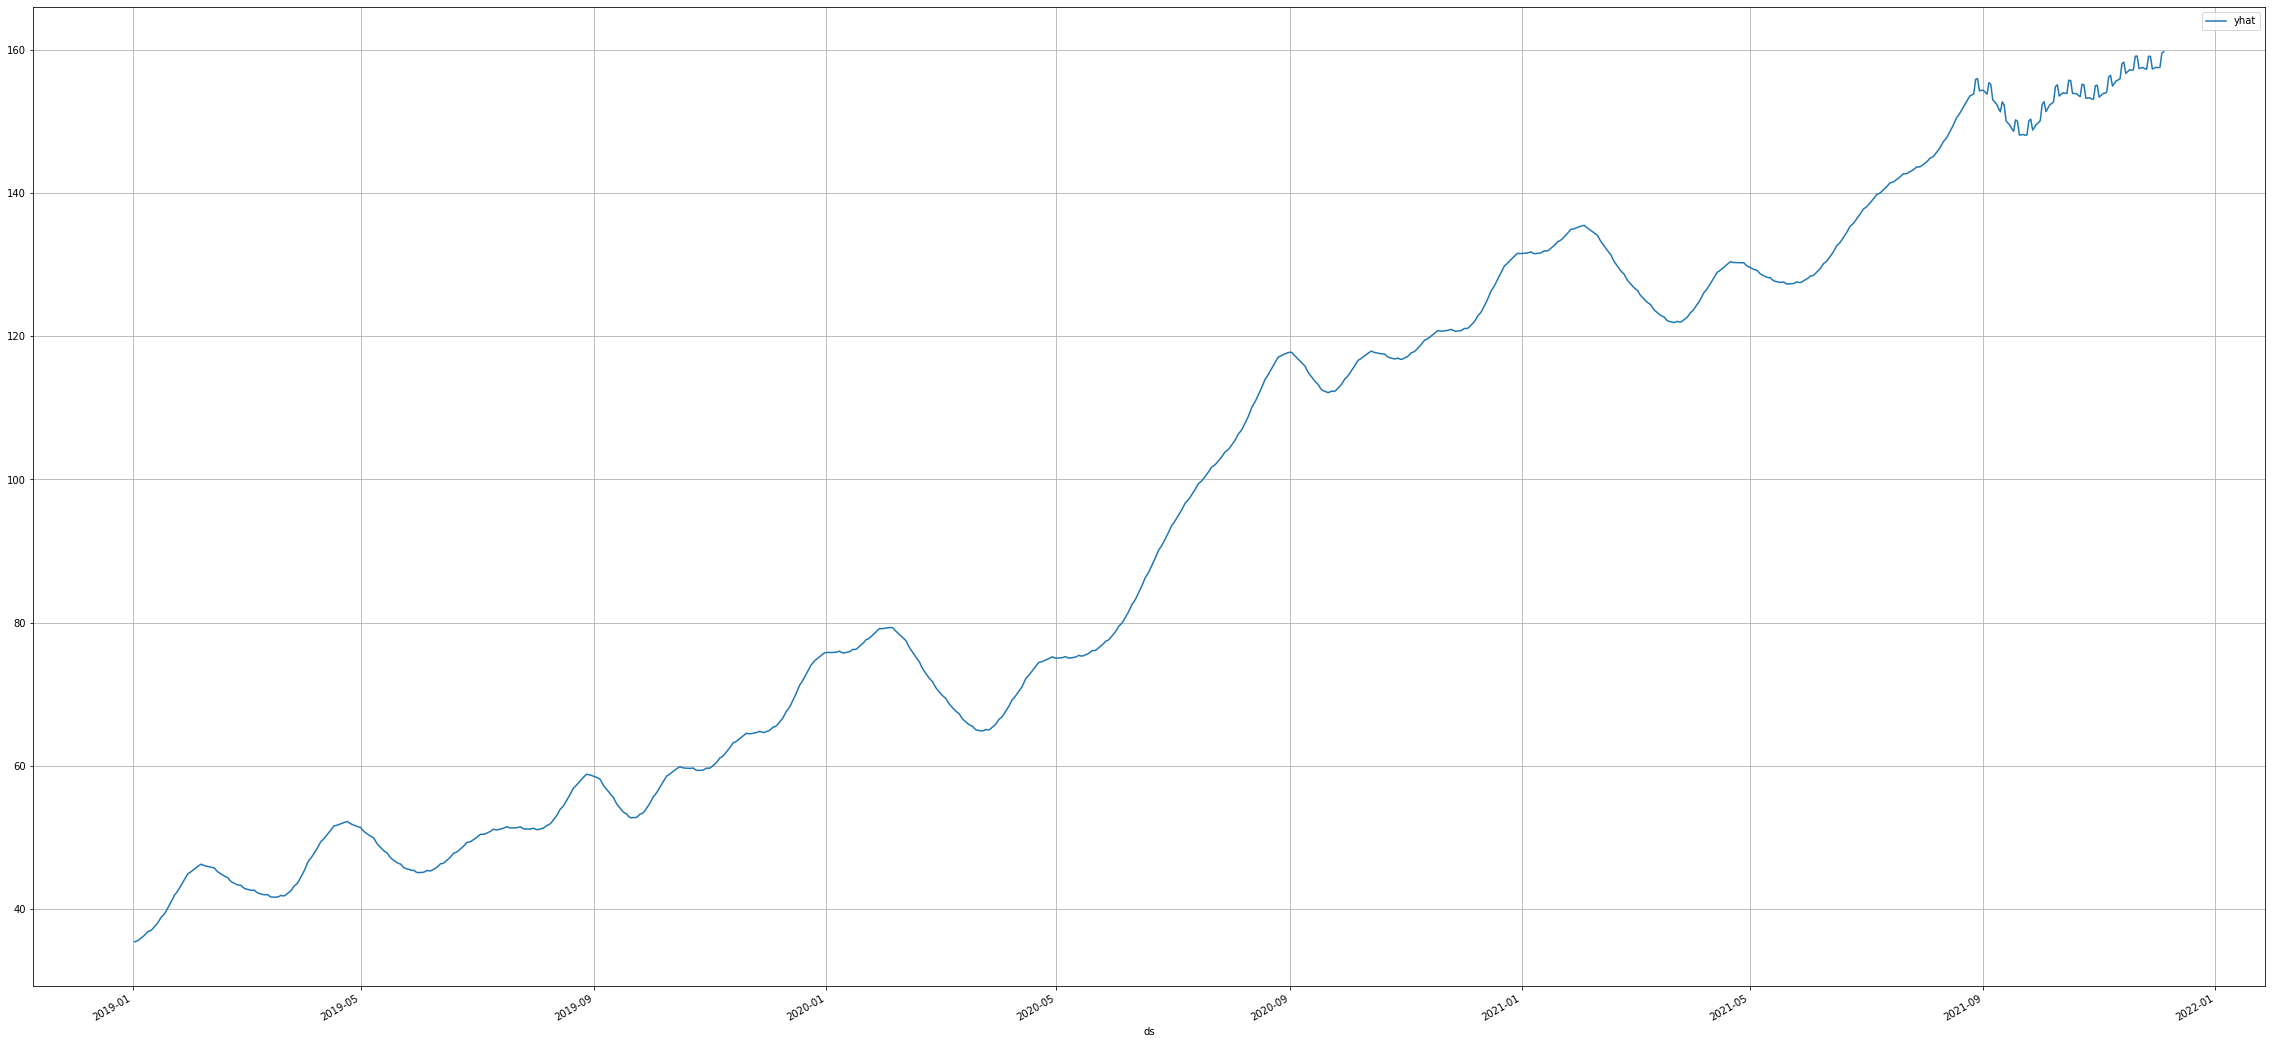

In [79]:
forecast.plot('ds','yhat',figsize=(40, 20),grid=True)
plt.show